In [310]:
# refer URL  :
# https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d
#-------------------- Load data ----------------------------
#-----------------------------------------------------------
#----- dataset has 1,460 rows and 81 columns  
#----- numeric : 38 
#----- string : 43
#-----------------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None
 
# read the data

define_fileName = 'train'; # train or test <== เลือกว่าจะ crean ข้อมูล train หรือ test
df = pd.read_csv('file_price_house/'+define_fileName+'.csv') 
 

print(df.shape) # แสดง (Row, column)
print(df.dtypes) # แสดง data type

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("----------------------------------------")
print("### numeric columns -> ",len(numeric_cols))
print(numeric_cols) 

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

print("----------------------------------------")
print("### String Columns -> ",len(non_numeric_cols))
print(non_numeric_cols) 

(1459, 80)
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object
----------------------------------------
### numeric columns ->  37
['Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold']
----------------------------------------
### String Columns ->  43
['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfi

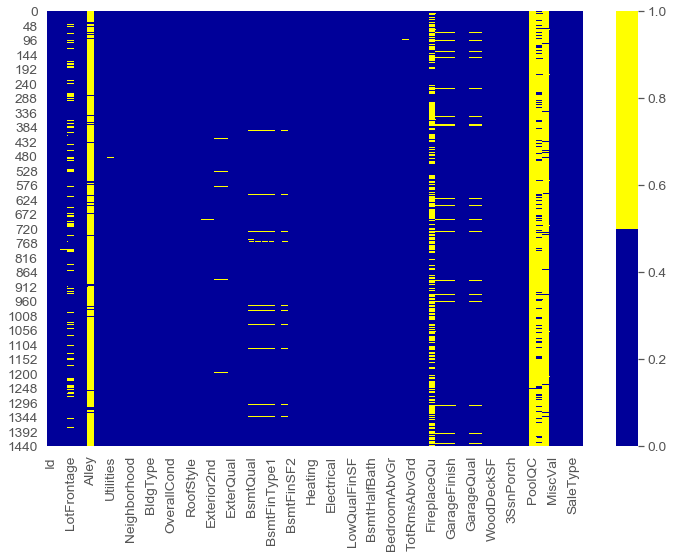

In [311]:
#1: find Missing Data Heatmap
##----------------------------------------------------------------------
## แถบสีเหลืองแทน ข้อมูลจำนวนที่หายไป(missing value)
## สีน้ำเงินแสดงข้อมูลทั่วไป
 
cols1 = df.columns[0:81] #  view column 0 to 81
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols1].isnull(), cmap=sns.color_palette(colours))
 

In [312]:
# แสดง missiong value เป็น % เพื่อเลือก column มา clean ข้อมูล
# ตัวที่มีค่า missing value > 50 % ค่าที่เป็น null 
# Scan Column Missing Value ลบไป 4 Feature ข้อมูล missing เยอะเกินที่ทีมจะยอมรับ 
#---------------------------
#Remove :  Alley ==> 94.0 %
#Remove :  PoolQC ==> 100.0 %
#Remove :  Fence ==> 81.0 %
#Remove :  MiscFeature ==> 96.0 %
#----------------------------------------
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    #print('{} - {}%'.format(col, round(pct_missing*100)))
    if round(pct_missing*100) > 50:  
        print('Remove column : ',col,'==>',round(pct_missing*100), ' %')
        cols_to_drop = ['{}'.format(col)] 
        df.drop(cols_to_drop,axis=1,inplace=True)
        
#df_missing.head()
print(df.shape)
df.head()
 

Remove column :  Alley ==> 93.0  %
Remove column :  PoolQC ==> 100.0  %
Remove column :  Fence ==> 80.0  %
Remove column :  MiscFeature ==> 97.0  %
(1459, 76)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [313]:
# ข้อมูลที่มี missing value
#3: Missing Data Histogram 
# Scan Row Missing Value นับจำนวนว่า row ที่ missing มีจำนวนเท่าไหร่ 
  
print('Missing Column :')

for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    pct_missing = np.mean(df[col].isnull())
    
    if num_missing > 0:  
        print('- {}'.format(col) , '=>' , num_missing,'(',round(pct_missing*100),'%) ')
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)
 
df.shape
df.head()

Missing Column :
- MSZoning => 4 ( 0.0 %) 
- LotFrontage => 227 ( 16.0 %) 
- Utilities => 2 ( 0.0 %) 
- Exterior1st => 1 ( 0.0 %) 
- Exterior2nd => 1 ( 0.0 %) 
- MasVnrType => 16 ( 1.0 %) 
- MasVnrArea => 15 ( 1.0 %) 
- BsmtQual => 44 ( 3.0 %) 
- BsmtCond => 45 ( 3.0 %) 
- BsmtExposure => 44 ( 3.0 %) 
- BsmtFinType1 => 42 ( 3.0 %) 
- BsmtFinSF1 => 1 ( 0.0 %) 
- BsmtFinType2 => 42 ( 3.0 %) 
- BsmtFinSF2 => 1 ( 0.0 %) 
- BsmtUnfSF => 1 ( 0.0 %) 
- TotalBsmtSF => 1 ( 0.0 %) 
- BsmtFullBath => 2 ( 0.0 %) 
- BsmtHalfBath => 2 ( 0.0 %) 
- KitchenQual => 1 ( 0.0 %) 
- Functional => 2 ( 0.0 %) 
- FireplaceQu => 730 ( 50.0 %) 
- GarageType => 76 ( 5.0 %) 
- GarageYrBlt => 78 ( 5.0 %) 
- GarageFinish => 78 ( 5.0 %) 
- GarageCars => 1 ( 0.0 %) 
- GarageArea => 1 ( 0.0 %) 
- GarageQual => 78 ( 5.0 %) 
- GarageCond => 78 ( 5.0 %) 
- SaleType => 1 ( 0.0 %) 


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,FireplaceQu_ismissing,GarageType_ismissing,GarageYrBlt_ismissing,GarageFinish_ismissing,GarageCars_ismissing,GarageArea_ismissing,GarageQual_ismissing,GarageCond_ismissing,SaleType_ismissing,num_missing
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,True,False,False,False,False,False,False,False,False,1
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,True,False,False,False,False,False,False,False,False,1
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,False,False,False,False,False,False,False,False,False,0
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,False,False,False,False,False,False,False,False,False,0
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,True,False,False,False,False,False,False,False,False,1


In [314]:
# ลบ row ที่เป็น mission value โดยกำหนดเงื่อนไข 30 % ของ 81 columne = 24 
# ไม่มี row ที่เกิด 30 % ไม่ลบ
###########################################################
ind_missing = df[df['num_missing'] > 24].index


df_less_missing_rows.head()
print(df_less_missing_rows.shape)
print(df.shape)


(1460, 93)
(1459, 106)


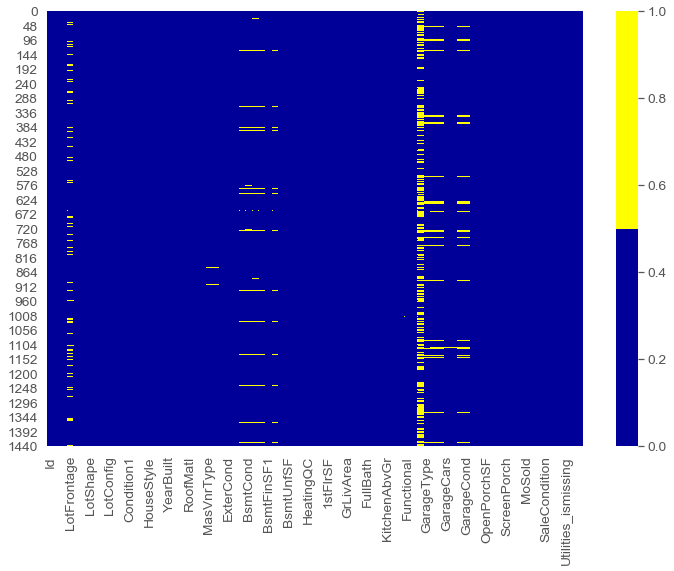

In [315]:
# เช็คข้อมูลยังมี missing value หรืออยู่หรือไม่
# FireplaceQu => 690 ( 47.0 %) 
##------------------------------------------
cols1 = df.columns[0:81] #  view column 0 to 81
colours = ['#000099', '#ffff00']  
sns.heatmap(df[cols1].isnull(), cmap=sns.color_palette(colours))

In [316]:
 ## ลบข้อมูล column ที่นำมาเทียบเพื่อหา row misssing value ออก
ismissing_cols = [col for col in df.columns if 'ismissing' in col] 
df.drop(df[ismissing_cols],axis=1,inplace=True)

##ลบข้อมูลที่ไม่จำเป็นออก
#ismissing_cols = [col for col in df.columns if 'Id' in col] 
#df.drop(df[ismissing_cols],axis=1,inplace=True)

ismissing_cols = [col for col in df.columns if 'num_missing' in col] 
df.drop(df[ismissing_cols],axis=1,inplace=True)
     

In [317]:
## Replace Mising Value 
# ถ้าเป็นตัวเลขจะ replace ด้วยค่า mean
# ถ้าเป็นตัวอักษร replace ด้วยค่าที่มีความถี่เยอะที่สุด
## replace value 
print(df.shape) 

for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)  
    if num_missing > 0:  
        col_chk = '{}'.format(col) 
        print('- {}'.format(col) , '=>' , num_missing)  
        is_number = np.issubdtype(df[col_chk].dtype, np.number) 
        if  is_number :   # Replace number replace mean
             med = df[col].mean()
             df[col] = df[col].fillna(med)
        else : 
              top = df[col].describe()['top'] # Replace string impute with the most frequent value.
              df[col] = df[col].fillna(top)
                
                
print(df.shape) 
df.head()

(1459, 76)
- MSZoning => 4
- LotFrontage => 227
- Utilities => 2
- Exterior1st => 1
- Exterior2nd => 1
- MasVnrType => 16
- MasVnrArea => 15
- BsmtQual => 44
- BsmtCond => 45
- BsmtExposure => 44
- BsmtFinType1 => 42
- BsmtFinSF1 => 1
- BsmtFinType2 => 42
- BsmtFinSF2 => 1
- BsmtUnfSF => 1
- TotalBsmtSF => 1
- BsmtFullBath => 2
- BsmtHalfBath => 2
- KitchenQual => 1
- Functional => 2
- FireplaceQu => 730
- GarageType => 76
- GarageYrBlt => 78
- GarageFinish => 78
- GarageCars => 1
- GarageArea => 1
- GarageQual => 78
- GarageCond => 78
- SaleType => 1
(1459, 76)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


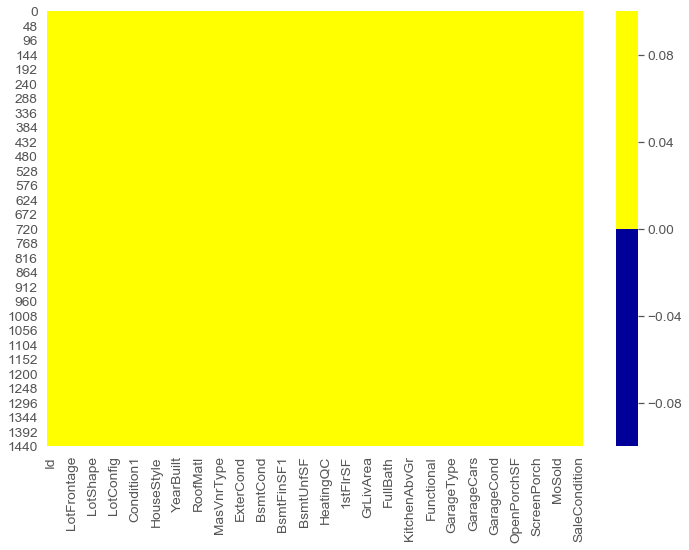

In [318]:
# เช็คข้อมูลยังมี missing value อยู่ 
# จะเห็นได้ว่าไม่มี missing value 
##------------------------------------------
cols1 = df.columns[0:81]
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols1].isnull(), cmap=sns.color_palette(colours))

In [319]:
# แสดงข้อมูลที่ clean value
##########################

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [320]:
#data number
data_numeric = df.select_dtypes(include=[np.number]) 
print("Number value",data_numeric.shape) 

# data string 
data_non_numeric = df.select_dtypes(exclude=[np.number])
print("String value",data_non_numeric.shape)

# data string ที่ถูกแปลงค่า
t_data = pd.get_dummies(data_non_numeric)
print("convert String",t_data.shape)

v = len(data_numeric.columns.values)+len(t_data.columns.values);
print('ข้อมูล number + string binary ต้องรวมกันได้ =',v,' column')
#แปลงข้อมูล string ให้อยู่ในระบบ binary ดังตัวอย่าง

df_convert = pd.get_dummies(df)
df_convert.head()

Number value (1459, 37)
String value (1459, 39)
convert String (1459, 223)
ข้อมูล number + string binary ต้องรวมกันได้ = 260  column


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0


In [321]:
# ตัวอย่างการแปลงค่าจาก string to binary
#โดยจะดึงค่า row มาแสดงเป็น column ทำให้ค่า column เพิ่มขึ้น
################################################
col_ex = df["LandContour"] 
xxx =  pd.get_dummies(col_ex)
xxx.head()

,Bnk,HLS,Low,Lvl
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,1,0,0


In [322]:
#ดูความสัมพันธ์ของข้อมูลเพื่อเลือก Feature เพื่อ เลือก feature
# https://levelup.gitconnected.com/pearson-coefficient-of-correlation-using-pandas-ca68ce678c04
#.core() for ignore not string
# Pearson Coefficient of Correlation
########################################
cols=[]

if set(['SalePrice']).issubset(df_convert.columns):
    corrmat = df_convert.corr() 
    corr = corrmat.sort_values('SalePrice') 
    cols = corr['SalePrice'][corr['SalePrice'].values > 0.2].index.values  
    k = len(cols) #ต้องการใช้ข้อมูล top xx มาใช้
    cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index 

    cm = np.corrcoef(df_convert[cols].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()
         
else:
  print("No display . Display When SalePrice Column ")

 

No display . Display When SalePrice Column 


In [323]:
most_corr=[]
if set(['SalePrice']).issubset(df.columns):
    most_corr = pd.DataFrame(cols)
    most_corr.columns = ['Most Correlated Features']

most_corr


[]

In [324]:
##################################
## พิจารณาที่ SalePrice เพื่อดูข้อมูล Min , max
##################################
#df.describe(include='all')
dis=[]
try:
     dis=df_convert['SalePrice'].describe();
except KeyError:
    print(f"Unknow Field Sale Price")
 
dis
 

Unknow Field Sale Price


[]

In [325]:
## ทดลองหา Clean Outler Sale Price
if set(['SalePrice']).issubset(df_convert.columns):
    tmp_outlier= "SalePrice"
    func_convertReplaceOulier(tmp_outlier)
    df_convert["is_select_"+tmp_outlier].describe()


In [326]:
############################################
## ต้อง min-max normolize ข้อมูลที่ clean outlier แล้ว
############################################
arr_zero = [] 
def min_max_normalize(ColName):
    try:
        min_val = min(df_convert[ColName])
        max_val = max(df_convert[ColName])
         
        print(f" {count } :  min : {min_val}, max : {max_val}, column  : {ColName}")
        if((min_val == max_val ) ): 
             arr_zero.append(ColName)
        
        fraction = (max_val - min_val)
        if(fraction > 0 ):
            df_convert[ColName]=df_convert[ColName].apply(lambda x: (x-min_val) / fraction)
        else :
            df_convert[ColName] = 0;  
            
        
        #for it in df[ColName]:
        #    it = (it-min_val) / (max_val - min_val)
        #   print(it)
        
    except KeyError:
        print(f"Error Min-Max Normalize ! Unknow Field"+ColName)
      
        
        
############################################       
## หา outlier ของข้อมูลและ set ใส่ค่าเพื่อระบุว่าจะใช้ "is_select_"
##########################################################

def func_convertReplaceOulier(ColName):
    try:
        field_select_name = "is_select_"+ColName
        Q1 = df_convert[ColName].quantile(0.25)
        Q3 = df_convert[ColName].quantile(0.75)
        df_convert[field_select_name] = np.where(df_convert[ColName] < Q1, Q1,df_convert[ColName])
        df_convert[field_select_name] = np.where(df_convert[ColName] > Q3, Q3,df_convert[ColName])
        
        # ทำ min-max Normolize ต่อ
        min_max_normalize(field_select_name)
    except KeyError: 
        print(f' Column : {ColName} is error outlier')
  
 

In [327]:
## Loop for Clean Field 
# ถ้าข้อมูลน้อยกว่า min ให้ replace min , ถ้าข้อมูลมากกว่า max ให้ replace max
############################## 
## example
### 1	OverallQual
#func_convertReplaceOulier("OverallQual")
###############################################
arr_zero = []
count=0

if set(['SalePrice']).issubset(df_convert.columns):
    all_column = most_corr["Most Correlated Features"]
    for col in all_column:
        count +=1
        func_convertReplaceOulier(col) 
else : ## case กรณีเป็นข้อมูลไฟล์ test จะดึงข้อมูล train ที่คลีนก่อนหน้าเพื่อมาหา column ที่ทำการ clean เพื่อให้ข้อมูลตรงกัน
    data_train = pd.read_csv('file_price_house/train_clean.csv') 
    for col_t in data_train.columns:# loop เอา column ทั้งหด
        if 'is_select_'  in col_t: 
            col_s =col_t.replace("is_select_","")   
            #print(col_s)
            func_convertReplaceOulier(col_s)
            
#แสดงแค่ข้อมูลที่เลือก
IsSelect = [col for col in df_convert.columns if 'is_select_'  in col] 
df_convert[IsSelect].head()

 Column : SalePrice is error outlier
 0 :  min : 1.0, max : 7.0, column  : is_select_OverallQual
 0 :  min : 407.0, max : 1721.0, column  : is_select_GrLivArea
 0 :  min : 0.0, max : 2.0, column  : is_select_GarageCars
 0 :  min : 0.0, max : 576.0, column  : is_select_GarageArea
 0 :  min : 0.0, max : 1304.0, column  : is_select_TotalBsmtSF
 0 :  min : 407.0, max : 1382.5, column  : is_select_1stFlrSF
 0 :  min : 0.0, max : 2.0, column  : is_select_FullBath
 0 :  min : 3.0, max : 7.0, column  : is_select_TotRmsAbvGrd
 0 :  min : 1879.0, max : 2001.0, column  : is_select_YearBuilt
 0 :  min : 1950.0, max : 2004.0, column  : is_select_YearRemodAdd
 0 :  min : 0.0, max : 1.0, column  : is_select_Foundation_PConc
 0 :  min : 0.0, max : 162.0, column  : is_select_MasVnrArea
 0 :  min : 1895.0, max : 2001.0, column  : is_select_GarageYrBlt
 0 :  min : 0.0, max : 1.0, column  : is_select_Fireplaces
 0 :  min : 0.0, max : 1.0, column  : is_select_ExterQual_Gd
 0 :  min : 0.0, max : 1.0, column

,is_select_OverallQual,is_select_GrLivArea,is_select_GarageCars,is_select_GarageArea,is_select_TotalBsmtSF,is_select_1stFlrSF,is_select_FullBath,is_select_TotRmsAbvGrd,is_select_YearBuilt,is_select_YearRemodAdd,...,is_select_CentralAir_Y,is_select_MSZoning_RL,is_select_HouseStyle_2Story,is_select_Electrical_SBrkr,is_select_BsmtQual_Gd,is_select_GarageType_Attchd,is_select_PavedDrive_Y,is_select_BsmtFullBath,is_select_LotShape_IR1,is_select_BsmtUnfSF
0,0.666667,0.372146,0.5,1.000000,0.676380,0.501281,0.5,0.50,0.672131,0.203704,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.338558
1,0.833333,0.701674,0.5,0.541667,1.000000,0.945156,0.5,0.75,0.647541,0.148148,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.509091
2,0.666667,0.929985,1.0,0.836806,0.711656,0.534085,1.0,0.75,0.967213,0.888889,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.171787
3,0.833333,0.910959,1.0,0.815972,0.710123,0.532035,1.0,1.00,0.975410,0.888889,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.406270
4,1.000000,0.664384,1.0,0.878472,0.981595,0.894926,1.0,0.50,0.926230,0.777778,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.000000


In [328]:
#พบข้อมูลที่มี ค่า min = max เป็น 0
#จึงได้ทำการลบข้อมูล
IsSelect = [col for col in df_convert.columns if 'is_select_'  in col] 
print('ข้อมูล min = max : ',len(arr_zero), ' column')
print("before drop Feature : ",df_convert.shape)
#print(arr_zero) 
df_convert.head()  

try:
    if(len(arr_zero) > 0): #drop
        for col in arr_zero:
            if set([col]).issubset(df_convert.columns):
                df_convert.drop(col, axis = 1, inplace = True)
                
except KeyError: 
        print(f' Error Something....')

print("after drop Feature : ",df_convert.shape)

df_convert.head() 
 
 

ข้อมูล min = max :  0  column
before drop Feature :  (1459, 297)
after drop Feature :  (1459, 297)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,is_select_CentralAir_Y,is_select_MSZoning_RL,is_select_HouseStyle_2Story,is_select_Electrical_SBrkr,is_select_BsmtQual_Gd,is_select_GarageType_Attchd,is_select_PavedDrive_Y,is_select_BsmtFullBath,is_select_LotShape_IR1,is_select_BsmtUnfSF
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.338558
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.509091
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.171787
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.406270
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.000000


In [329]:
# All Feature is Select
#############################

IsSelect = [col for col in df_convert.columns if 'is_select_' in col] 
print(df_convert[IsSelect].shape)
df_convert[IsSelect].head()

(1459, 37)


,is_select_OverallQual,is_select_GrLivArea,is_select_GarageCars,is_select_GarageArea,is_select_TotalBsmtSF,is_select_1stFlrSF,is_select_FullBath,is_select_TotRmsAbvGrd,is_select_YearBuilt,is_select_YearRemodAdd,...,is_select_CentralAir_Y,is_select_MSZoning_RL,is_select_HouseStyle_2Story,is_select_Electrical_SBrkr,is_select_BsmtQual_Gd,is_select_GarageType_Attchd,is_select_PavedDrive_Y,is_select_BsmtFullBath,is_select_LotShape_IR1,is_select_BsmtUnfSF
0,0.666667,0.372146,0.5,1.000000,0.676380,0.501281,0.5,0.50,0.672131,0.203704,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.338558
1,0.833333,0.701674,0.5,0.541667,1.000000,0.945156,0.5,0.75,0.647541,0.148148,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.509091
2,0.666667,0.929985,1.0,0.836806,0.711656,0.534085,1.0,0.75,0.967213,0.888889,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.171787
3,0.833333,0.910959,1.0,0.815972,0.710123,0.532035,1.0,1.00,0.975410,0.888889,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.406270
4,1.000000,0.664384,1.0,0.878472,0.981595,0.894926,1.0,0.50,0.926230,0.777778,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.000000


In [330]:
#Save File Create for wait model

import pandas as pd 
df_convert.head() 
pd.DataFrame(df_convert).to_csv("file_price_house/"+define_fileName+"_clean.csv")